In [1]:
import k2.version

In [2]:
k2.version.version.main()


k2 version: 1.23.2
Build type: Release
Git SHA1: a34171ed85605b0926eebbd0463d059431f4f74a
Git date: Tue Dec 13 16:06:38 2022
Cuda used to build k2: 10.2
cuDNN used to build k2: 7.6.5
Python version used to build k2: 3.7
OS used to build k2: Ubuntu 16.04.7 LTS
CMake version: 3.16.0
GCC version: 8.2.0
CMAKE_CUDA_FLAGS:   -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_70,code=sm_70 -DONNX_NAMESPACE=onnx_c2 -gencode arch=compute_70,code=sm_70 -Xcudafe --diag_suppress=cc_clobber_ignored,--diag_suppress=integer_sign_change,--diag_suppress=useless_using_declaration,--diag_suppress=set_but_not_used,--diag_suppress=field_without_dll_interface,--diag_suppress=base_class_has_different_dll_interface,--diag_suppress=dll_interface_conflict_none_assumed,--diag_suppress=dll_interface_conflict_dllexport_assumed,--diag_suppress=implicit_return_from_non_void_function,--diag_suppress=unsigned_compare_with_zero,--diag_suppress=declared_but_not_refe

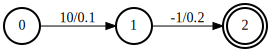

In [3]:
import k2
s = '''
0 1 10 0.1
1 2 -1 0.2
2
'''
fsa = k2.Fsa.from_str(s)
fsa.draw('simple_fsa.svg')

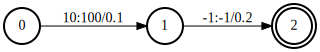

In [4]:
import k2
import torch
s = '''
0 1 10 0.1
1 2 -1 0.2
2
'''
fsa = k2.Fsa.from_str(s)
fsa.aux_labels = torch.tensor([100, -1], dtype=torch.int32)
fsa.draw('simple_fst.svg')

In [5]:
import k2
import torch
s = '''
0 1 10 0.1
1 2 -1 0.2
2
'''
fsa = k2.Fsa.from_str(s)
fsa.output_labels = torch.tensor([100, -1], dtype=torch.int32)
fsa.draw('simple_fst.svg')
print(fsa.shape)

(3, None)


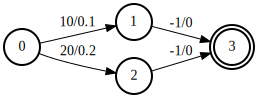

In [6]:
import k2
s = '''
0 1 10 0.1
0 2 20 0.2
1 3 -1 0
2 3 -1 0
3
'''
fsa = k2.Fsa.from_str(s)
fsa.draw('fsa2.svg')

In [7]:
fsa

In [9]:
fsa.device

device(type='cpu')

In [10]:
fsa.shape

(4, None)

In [11]:
fsa = k2.create_fsa_vec([fsa])

In [12]:
fsa

In [13]:
fsa.shape

(1, None, None)

In [14]:
total_scores = fsa.get_tot_scores(log_semiring=False, use_double_scores=False)

In [15]:
total_scores

tensor([0.2000])

In [16]:
total_scores = fsa.get_tot_scores(log_semiring=True, use_double_scores=False)

In [17]:
total_scores

tensor([0.8444])

In [18]:
fsa.__getitem__(0)

In [19]:
dir(fsa)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_get_arc_cdf',
 '_get_arc_post',
 '_get_backward_scores',
 '_get_dest_states',
 '_get_entering_arc_batches',
 '_get_entering_arcs',
 '_get_forward_scores',
 '_get_incoming_arcs',
 '_get_leaving_arc_batches',
 '_get_state_batches',
 '_get_tot_scores',
 '_invalidate_cache_',
 '_non_tensor_attr',
 '_properties',
 '_tensor_attr',
 'arcs',
 'arcs_as_tensor',
 'as_dict',
 'clone',
 'convert_attr_to_ragged_',
 'detach',
 'device',
 'draw',
 'from_dict',
 'from_fsas',
 'from_openfst',
 'from_str',
 'get_arc_post',
 'get_backward_scores',
 'get_filler',
 'get_forward_scores',
 'get_tot_s

In [20]:
fsa.device

device(type='cpu')

In [21]:
fsa.is_cpu()

True

In [22]:
fsa.is_cuda()

False

In [23]:
fsa.shape

(1, None, None)

In [24]:
import k2
import torch

nnet_output = torch.tensor([0.1, 1, 0.2, 0.5], dtype=torch.float32)
# assume nnet_output is the output of some neural network
nnet_output.requires_grad_(True)
s = '''
0 1 10 0
0 2 20 0
1 3 -1 0
2 3 -1 0
3
'''
fsa = k2.Fsa.from_str(s)
fsa.scores = nnet_output
fsa.draw('autograd_tropical.svg')
print(fsa.shape)

(4, None)


In [25]:
fsa_vec = k2.create_fsa_vec([fsa])
total_scores = fsa_vec.get_tot_scores(log_semiring=False, use_double_scores=False)

total_scores.backward()
print(nnet_output.grad)
# # It prints: tensor([0., 1., 0., 1.])

tensor([0., 1., 0., 1.])


In [26]:
fsa_vec = k2.create_fsa_vec([fsa])
total_scores = fsa_vec.get_tot_scores(log_semiring=True, use_double_scores=False)

total_scores.backward()
print(nnet_output.grad)
# # It prints: tensor([0.2315, 1.7685, 0.2315, 1.7685])

tensor([0.2315, 1.7685, 0.2315, 1.7685])


In [27]:
print(fsa.arcs.row_splits)

<bound method PyCapsule.row_splits of <_k2.RaggedArc object at 0x7fb84b9aa6c0>>


In [36]:
fsa.to('cuda:0')

In [37]:
fsa.device

device(type='cpu')

In [38]:
fsa.is_cuda()

False

In [40]:
k2.ctc_loss

<function k2.ctc_loss.ctc_loss(decoding_graph: k2.fsa.Fsa, dense_fsa_vec: k2.dense_fsa_vec.DenseFsaVec, output_beam: float = 10, delay_penalty: float = 0.0, reduction: typing_extensions.Literal['none', 'mean', 'sum'] = 'sum', use_double_scores: bool = True, target_lengths: Union[torch.Tensor, NoneType] = None) -> torch.Tensor>

In [42]:
k2.with_cuda

True

In [47]:
s = '''
            0 1 1 0.1
            0 1 2 0.2
            1 2 -1 0.3
            2
'''

In [50]:
device=torch.device('cuda', 0)

In [51]:
fsa1 = k2.Fsa.from_str(s).to(device)

In [52]:
fsa1.device

device(type='cuda', index=0)

In [53]:
fsa1.tensor_attr1 = torch.tensor([1, 2, 3]).to(device)
fsa1.tensor_attr2 = torch.tensor([4, 5, 6]).to(device)
fsa1.non_tensor_attr1 = 'fsa1'

In [54]:
fsa1.ragged_tensor_attr1 = \
        k2.RaggedTensor('[[1 2] [] [3 4 5]]').to(device)
fsa1.ragged_tensor_attr2 = \
        k2.RaggedTensor('[[1 20] [30] [5]]').to(device)

In [55]:
fsa2 = k2.Fsa.from_str(s).to(device)
fsa2.tensor_attr1 = torch.tensor([10, 20, 30]).to(device)
fsa2.tensor_attr3 = torch.tensor([40, 50, 60]).to(device)
fsa2.non_tensor_attr1 = 'fsa'
fsa2.non_tensor_attr2 = 'fsa2'

fsa2.ragged_tensor_attr1 = \
        k2.RaggedTensor('[[3] [4 5] [6 7]]').to(device)
fsa2.ragged_tensor_attr3 = \
        k2.RaggedTensor('[[1 0] [0] [-1]]').to(device)

In [56]:
fsa2.device

device(type='cuda', index=0)

In [57]:
fsa_vec1 = k2.create_fsa_vec([fsa1])
fsa_vec2 = k2.create_fsa_vec([fsa2])
fsa_vec = k2.cat([fsa_vec1, fsa_vec2])

In [58]:
fsa_vec1.device

device(type='cuda', index=0)

In [59]:
fsa_vec.device

device(type='cuda', index=0)

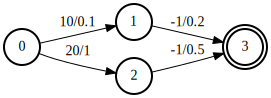

In [60]:
fsa.draw('test.svg')